# 1. Introduction

In the past few missions, you've learned how to use Pandas to analyze data quickly and efficiently. You applied this knowledge by creating guided projects to solidify your knowledge. You'll go further in this project, and you'll build an end-to-end data analysis project on your own, using Pandas and Python.



## 2. The data

In this project, you'll be working with crime data from [Montgomery County, MD](https://en.wikipedia.org/wiki/Montgomery_County,_Maryland). Each row in the data is a crime reported by a law enforcement officer in <span style="background-color: #F9EBEA; color:##C0392B">2013</span> and entered into a database.

You'll want to download the data from the repository. After downloading the data, you'll want to create a new Jupyter notebook in the same folder, and ensure that any code or analysis you do on the data occurs in that notebook.

You can load the data in and display the first <span style="background-color: #F9EBEA; color:##C0392B">5</span> rows to get a better idea of the structure:

>```python
import pandas as pd
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head()
```

You'll also want to display all of the column names with:

>```python
crimes.columns
```
>```python
Index(['Incident ID', 'CR Number', 'Dispatch Date / Time', 'Class',
       'Class Description', 'Police District Name', 'Block Address', 'City',
       'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Start Date / Time', 'End Date / Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Address Number'],
      dtype='object')
```

After displaying some of the data, make sure you look through and understand each column. It can be helpful to display the first few values in each column in order to understand it better. It can also be useful to perform a Google search to help give you context for columns. For example, looking up <span style="background-color: #F9EBEA; color:##C0392B">Police District Number Montgomery County</span> bring you to this [page](https://www.montgomerycountymd.gov/pol/districts/map.html), which helps you understand them. Make sure to write up a Markdown cell explaining anything relevant that you learned.

You'll also want to explore missing values in each column. Why do you think certain columns have missing values? Make sure to write up your thoughts on missing values, and how they'll impact your analysis.

Also make sure to look at the format of each column. For example, <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span> is a float column, but if you know about Zip codes in the US, you know that they're always integers. Keeping that this column is of the "wrong" type in mind will help you as you analyze the data.

## 3. Analyzing the times of crimes

The  <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column looks very interesting, because it allows us to figure out when crimes are most likely to occur. You can use this column to answer questions like:

- What day of the week are the most crimes committed on? (ie Monday, Tuesday, etc)
- During what time of day are the most crimes committed?
- During what month are the most crimes committed?

You can answer these questions by first parsing the <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column using the [pandas.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function, like this:

>```python
d_time = pandas.to_datetime(crimes["Dispatch Date / Time"])
```

After doing the type conversion, you'll need to extract the components of the datetime you're interested in. You can see documentation for this [here](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties). After the extraction, you can use the <span style="background-color: #F9EBEA; color:##C0392B">pandas.Series.value_counts</span> method to count up the items you want.

There is some nuance around counting up the time of day when crimes are committed. You'll have to decide how you want to define "time of day". This can be as simple as using the hour, or as complex as assigning categories to certain times, like "morning", "afternoon", "evening", and "night".

As you answer these questions, make sure to document your code, and add in explanations after each cell. Your explanations should discuss the answer, along with anything interesting your discovered.

Were you surprised by your findings? Why do you think that crimes follow the patterns that they do? It may be useful to do some research here to see if you can find support for your theories.

After you're done, take a look at the <span style="background-color: #F9EBEA; color:##C0392B">End Date / Time</span> and <span style="background-color: #F9EBEA; color:##C0392B">Start Date / Time</span> columns. Are these different from the <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column? Would it be useful to use one or both of those columns to do this analysis instead?


## 4. Analyzing locations of crimes

There are a few columns that encode information about the location of crimes:

- <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Block Address</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Sector</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Beat</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Police District Number</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Location</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Address Number</span>

These columns have varying numbers of missing values, and varying granularity. Some of the columns represent areas with large granularity (like police districts), whereas some represent areas with small granularity, like <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>, and <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>.


In order to decide which column to use to analyze the locations of crimes, you need to utilize the following criteria:

- **Granularity**. Areas that are too small aren't great, because only a few crimes were committed inside them, which makes it hard to analyze and compare. For example, if I tell you that Silver Spring (a city in Montgomery County) is the place with the most crimes, you'll know to avoid that area. However, if I tell you that a 100 foot section of Silver Spring has the most crimes, it won't be as helpful (it's unlikely that you'll ever be in that 100 foot section).
- **Comprehensibility**. You looked up the Police District map of Montgomery County before, so it's simple to tell what area corresponds to district <span style="background-color: #F9EBEA; color:##C0392B">6</span>. However, what area does Beat <span style="background-color: #F9EBEA; color:##C0392B">5M1</span> correspond to? You may be able to look this up, but it's harder to comprehend.
- **Missing values**. If a column has a lot of missing values, that means that the conclusions you draw are less valid, because you don't know if the missing data is systematic (ie all data for a given district is missing) or random (equal amounts of data are missing from each district). You should try to select a column that has minimal missing values.

Based on the above criteria, pick a column that you want to use to analyze location. After picking a column, see if you can answer these questions:

- In what area did the most crimes occur? What physical locations (like cities) does this area correspond to?
- Which area has the highest number of crimes per capita? You may be able to find population data per area online. For example, [this](https://www.montgomerycountymd.gov/POL/Resources/Files/crime/MCP2015AnnualCrimeReportFINAL.pdf) annual report has per-district populations towards the bottom.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
area_dsc = "Police District Number" # Área escolhida

area = crimes[area_dsc]
area_is_null = pd.isnull(area)
area_not_null = area[~area_is_null]
area_null = area[area_is_null]

# 1) Percentual de valores nulos na coluna escolhida.
percentage_null = len(area_null)*100/len(area_not_null)

# 2) Remove as linhas em que a coluna escolhida está preenchida com nulo.
crimes_area_not_null = crimes.dropna(axis=0, subset=[area_dsc])

# 3) Quantidade de linhas agrupado por área.
crimes_by_area = crimes_area_not_null.groupby(area_dsc)[area_dsc].count()
#crimes_by_area.to_dict()

# 4) Seleciona a área com maior ocorrência de crimes
crimes_by_area_sorted = crimes_by_area.sort_values(inplace=False, ascending=False)
area_most_crimes = crimes_by_area_sorted.index[0]

# 5) Cidades distintas na área de maior ocorrência de crimes.
locations = crimes_area_not_null[crimes_area_not_null[area_dsc] == area_most_crimes]["City"].unique()

# 6) Divide a quantidade de crimes encontrados por área, no item 3, pela população da área.
# ts = pd.Series(df['Value'].values, index=df['Date'])
population_by_area = pd.Series([149118, 182883, 152991, 208263, 131391, 147486],
        index=["1D","2D","3D","4D","5D","6D"])

# 7) Crimes per capita
crimes_per_capita = crimes_by_area.divide(population_by_area)

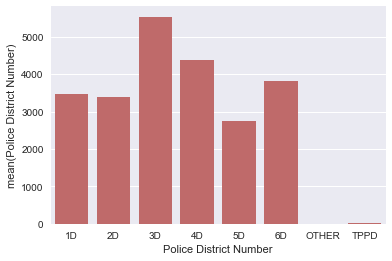

In [51]:
# 1) In what area did the most crimes occur?
sns.barplot(x=crimes_by_area.index,y=crimes_by_area, color="indianred")

In [39]:
# 2) What physical locations (like cities) does this area correspond to?
print(locations)

['SILVER SPRING' 'BURTONSVILLE' 'TAKOMA PARK' 'CHEVY CHASE' 'SPENCERVILLE'
 'LAUREL']


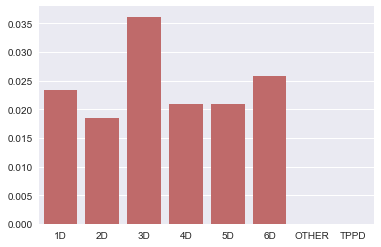

In [40]:
# 3) Which area has the highest number of crimes per capita?
sns.barplot(x=crimes_per_capita.index,y=crimes_per_capita, color="indianred")

## 5. Analyzing types of crime

The <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> column tells us something about the type of crime that was committed. We can use this column to discover which crimes are committed most often.

Here are some initial questions to answer:

- Which crimes are the most common? Least common?
- Can you split the types of crimes manually into "Violent" (caused harm to others or involved weapons) and "Nonviolent" (mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?

To manually split up violent and nonviolent crimes, just assign each crime to a category. For example, <span style="background-color: #F9EBEA; color:##C0392B">ASSAULT & BATTERY - CITIZEN</span> is violent, and <span style="background-color: #F9EBEA; color:##C0392B">VANDALISM-MOTOR VEHICLE</span> is nonviolent. It may be useful to create a column called <span style="background-color: #F9EBEA; color:##C0392B">Violent</span>, and then use the [pandas.DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) method to assign **True** or **False** to each row in the column. For example, if **ASSAULT** is in Class Description, it's violent, but if **LARCENY** is in Class Description, it's nonviolent.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

In [76]:
import pandas as pd
import numpy as np

crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")

group_classes = crimes.pivot_table(index='Class Description', values=['Incident ID'], aggfunc='count')
group_classes.rename(columns={'Incident ID':'Count'}, inplace=True)
group_classes.sort_values(by='Count', ascending=False).head(5) #Five most common
group_classes.sort_values(by='Count').head(5) #Five least common (but there are 31 crimes with count = 1)

,Count
Class Description,
ABANDONED AUTO,1
ROB KNIFE/CUT - CONV. STORE,1
ANIMAL OFFENSE - HOT CAR,1
PARKING OFFENSES,1
LARCENY COIN MACH $50-$199,1


In [77]:
keywords = ['ASSAULT','RAPE','HOMICIDE','ARSON','ABUSE','KIDNAPPING','AGG ASSLT','DRIVING UNDER',
            'BURG FORCE','BOMB','FIRE OTHER','ROB ','SEX OFFENDER']

def is_violent(row):
    class_description = row["Class Description"]
    if any(word in class_description for word in keywords):
        return True
    else:
        return False

violent = crimes.apply(is_violent, axis=1)
crimes['Violent'] = violent

crimes.head(5)

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number,Violent
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0,True
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN,False
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN,False
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN,False
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN,True


In [133]:
violent_classes = crimes.pivot_table(index=['Violent', 'Class Description'], values=['Incident ID'], aggfunc='count')
violent_classes.rename(columns={'Incident ID':'Count'}, inplace=True)
violent_classes.reset_index(inplace=True) #removing indexes

most_violent = violent_classes.sort_values(by=['Violent','Count'], ascending=[False, False]).head(5) #most common violent crime
most_nonviolent = violent_classes.sort_values(by=['Violent','Count'], ascending=[True, False]).head(5) #most common nonviolent crime

most_violent

,Violent,Class Description,Count
242,True,DRIVING UNDER THE INFLUENCE,1710
220,True,ASSAULT & BATTERY - CITIZEN,382
280,True,SIMPLE ASSAULT - CITIZEN,311
224,True,ASSAULT & BATTERY SPOUSE/PARTNER,290
236,True,BURG FORCE-RES/DAY,240


## 6. Combine Analysis

After doing some analysis on types of crimes, you can combine our analysis with location and time data to answer more complex questions, like:

- Where are the most violent crimes committed? How about nonviolent?
- When are the most violent crimes committed? How about nonviolent?

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

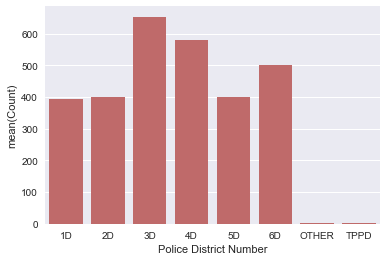

In [135]:
# 1) Where are the most violent crimes committed?
most_violent_count_by_area = crimes[crimes["Class Description"].isin(most_violent["Class Description"])].pivot_table(index=['Police District Number'], values=['Incident ID'], aggfunc='count')
most_violent_count_by_area.rename(columns={'Incident ID':'Count'}, inplace=True)
most_violent_count_by_area.reset_index(inplace=True) #removing indexes

sns.barplot(x=most_violent_count_by_area['Police District Number'], y=most_violent_count_by_area['Count'], color="indianred")

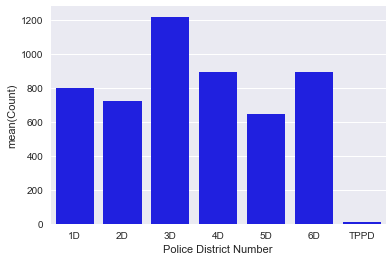

In [137]:
# 1) How about nonviolent?
most_nonviolent_count_by_area = crimes[crimes["Class Description"].isin(most_nonviolent["Class Description"])].pivot_table(index=['Police District Number'], values=['Incident ID'], aggfunc='count')
most_nonviolent_count_by_area.rename(columns={'Incident ID':'Count'}, inplace=True)
most_nonviolent_count_by_area.reset_index(inplace=True) #removing indexes

sns.barplot(x=most_nonviolent_count_by_area['Police District Number'], y=most_nonviolent_count_by_area['Count'], color="blue")

## 7. Posing and answering your own questions

After you've finished exploring the data and answering some directed questions, you should be able to start coming up with some of your own.

You can think of questions based on a few strategies:

- Expanding or tweaking the directed questions from earlier.
- Exploring patterns you found while exploring the data.
- Questions based on research you've done about the previous lessons

Try to think of at least three questions, then answer them the same way you did in previous screens.